In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
import scipy
import os
import random
import shutil
# import joblib

In [2]:
train_set = "D:/Research/Oral Cancer Detection/Data/Mendeley Data/100x_Split_dataset_v2/train"
test_set = "D:/Research/Oral Cancer Detection/Data/Mendeley Data/100x_Split_dataset_v2/test"
validation_set = "D:/Research/Oral Cancer Detection/Data/Mendeley Data/100x_Split_dataset_v2/validate"

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary')

Found 480 images belonging to 2 classes.
Found 149 images belonging to 2 classes.
Found 133 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'Normal': 0, 'OSCC': 1}

In [6]:
base_for_model = tf.keras.applications.InceptionV3(weights='imagenet', input_shape=(224,224,3), include_top=False)

In [7]:
for layer in base_for_model.layers:
    layer.trainable = False

In [8]:
model = Sequential()
model.add(base_for_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 gaussian_noise (GaussianNoi  (None, 5, 5, 2048)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization_94 (Bat  (None, 512)              2

In [9]:
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'binary_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [10]:
mp= tf.keras.callbacks.ModelCheckpoint(filepath='InceptionV3.hdf5', 
                               verbose=2, save_best_only=True)
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)
callback=[es,mp]

In [11]:
history = model.fit(
    train_generator,
#   steps_per_epoch= 4946/32,
    epochs = 10, #own choice
    validation_data = validation_generator,
    callbacks=callback
)

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.7609 - accuracy: 0.6187 - precision: 0.8685 - recall: 0.6338 - auc: 0.6516
Epoch 1: val_loss improved from inf to 2.98295, saving model to InceptionV3.hdf5
30/30 [==============================] - 42s 975ms/step - loss: 0.7609 - accuracy: 0.6187 - precision: 0.8685 - recall: 0.6338 - auc: 0.6516 - val_loss: 2.9830 - val_accuracy: 0.2685 - val_precision: 1.0000 - val_recall: 0.1210 - val_auc: 0.6724
Epoch 2/10
30/30 [==============================] - ETA: 0s - loss: 0.5125 - accuracy: 0.7563 - precision: 0.8740 - recall: 0.8232 - auc: 0.7171
Epoch 2: val_loss improved from 2.98295 to 1.30549, saving model to InceptionV3.hdf5
30/30 [==============================] - 27s 900ms/step - loss: 0.5125 - accuracy: 0.7563 - precision: 0.8740 - recall: 0.8232 - auc: 0.7171 - val_loss: 1.3055 - val_accuracy: 0.4228 - val_precision: 1.0000 - val_recall: 0.3065 - val_auc: 0.8592
Epoch 3/10
30/30 [==============================] - 

In [12]:
print(history.history.keys())
acc=(history.history['accuracy'])
loss=(history.history['loss'])
prc=(history.history['precision'])
rec=(history.history['recall'])
auc=(history.history['auc'])
val_acc=(history.history['val_accuracy'])
val_loss=(history.history['val_loss'])
val_prc=(history.history['val_precision'])
val_rec=(history.history['val_recall'])
val_auc=(history.history['val_auc'])

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


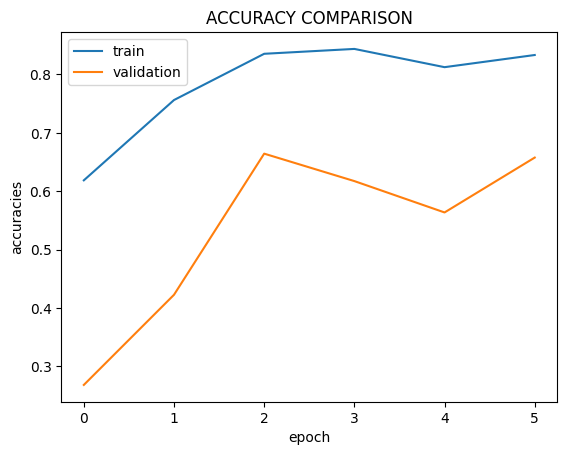

In [13]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('ACCURACY COMPARISON')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('ACCURACY COMPARISON')
plt.legend(['train','validation'])

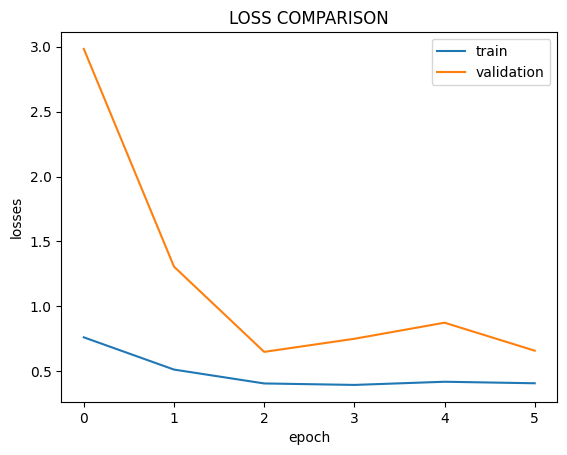

In [14]:
plt.title('LOSS COMPARISON')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train','validation'])

In [15]:
model.evaluate(train_generator)
model.evaluate(validation_generator)
model.evaluate(test_generator)

9/9 [==============================] - 7s 834ms/step - loss: 0.5521 - accuracy: 0.7143 - precision: 0.9551 - recall: 0.7143 - auc: 0.8331


[0.5520563721656799,
 0.7142857313156128,
 0.9550561904907227,
 0.7142857313156128,
 0.8331332206726074]

1/1 [==============================] - 2s 2s/step


'Normal'

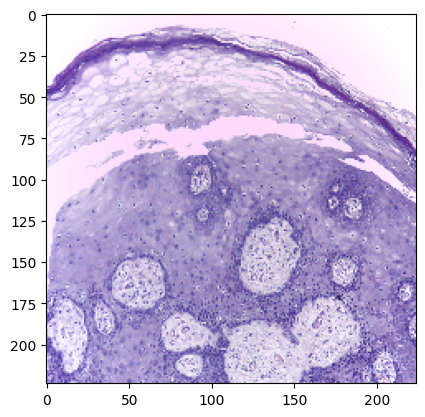

In [16]:

img =(image.load_img('D:/Research/Oral Cancer Detection/Data/Mendeley Data/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_12.jpg',target_size=(224,224)))
imaga = image.img_to_array(img)
image = np.expand_dims(imaga,axis=0)  
ypred = model.predict(image)
if ypred<0.5:
      ypred="Normal"
else:
      ypred="Squamous Cell Carcinoma" 
plt.imshow(img)
ypred

In [19]:
model.save("inceptionV3.h5")
print("Saved model to disk")

Saved model to disk
